In [1]:
#web scraping
#requests ,beautiful soup ,pd
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
pages_links= 10      #per page
no_of_pages= 100
base_url= "https://www.airlinequality.com/airline-reviews/british-airways"
reviews= []
for review in range(1,pages_links+1):
  print(f"scraping page {review}")
  url= f"{base_url}/page/{review}/?sortby=post_date%3ADesc&pagesize=100"
  response= requests.get(url)

  content= response.content
  soup= BeautifulSoup(content,"html.parser")
  for para in soup.find_all("div",{"class":"text_content"}):
    reviews.append(para.get_text())

  print(f"   ----> {len(reviews)} total reviews")

scraping page 1
   ----> 100 total reviews
scraping page 2
   ----> 200 total reviews
scraping page 3
   ----> 300 total reviews
scraping page 4
   ----> 400 total reviews
scraping page 5
   ----> 500 total reviews
scraping page 6
   ----> 600 total reviews
scraping page 7
   ----> 700 total reviews
scraping page 8
   ----> 800 total reviews
scraping page 9
   ----> 900 total reviews
scraping page 10
   ----> 1000 total reviews


In [3]:
data =pd.DataFrame()
data["reviews"]= reviews
data.head()

,reviews
0,✅ Trip Verified | British Airways is absolute ...
1,✅ Trip Verified | The flight time was changed ...
2,✅ Trip Verified | I'm so fraustrated. My fli...
3,✅ Trip Verified | We have sat on this plane fo...
4,Not Verified | British Airways stranding my w...


In [18]:
df= data.copy()
df1= data.copy()
df2= data.copy()
df3= data.copy()

In [5]:
df.to_csv("BA_reviews.csv")

In [45]:
df.iloc[0]

,0
reviews,✅ Trip Verified | British Airways is absolute ...


In [19]:
df.iloc[3,0]

'✅ Trip Verified | We have sat on this plane for an hour and forty five minutes awaiting takeoff due to bad weather in London. This is understandable for safety. Fortunately I have a long layover so this delay does not affect me. However many others are not so lucky. While waiting we were given one small bottle of water and one tiny pack of corn kernels. Later food and drink were offered for purchase. This is my complaint. After sitting idle on this plane for nearly two hours and possibly missing connecting flights they can’t give us a free bag of chips and a coke? When I asked I was told no. Is British Airways really this cheap and money grubbing?'

In [6]:
df

,reviews
0,✅ Trip Verified | British Airways is absolute ...
1,✅ Trip Verified | The flight time was changed ...
2,✅ Trip Verified | I'm so fraustrated. My fli...
3,✅ Trip Verified | We have sat on this plane fo...
4,Not Verified | British Airways stranding my w...
...,...
995,✅ Trip Verified | The seating configuration m...
996,✅ Trip Verified | No problems at the airport i...
997,✅ Trip Verified | Malaga to London Heathrow ....
998,✅ Trip Verified | Sydney to Singapore. Extrem...


In [20]:
df['reviews'][3]

'✅ Trip Verified | We have sat on this plane for an hour and forty five minutes awaiting takeoff due to bad weather in London. This is understandable for safety. Fortunately I have a long layover so this delay does not affect me. However many others are not so lucky. While waiting we were given one small bottle of water and one tiny pack of corn kernels. Later food and drink were offered for purchase. This is my complaint. After sitting idle on this plane for nearly two hours and possibly missing connecting flights they can’t give us a free bag of chips and a coke? When I asked I was told no. Is British Airways really this cheap and money grubbing?'

In [21]:
import nltk
from nltk.corpus import stopwords

# Download the 'stopwords' dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
import re
from nltk.corpus import stopwords
from nltk.sentiment.util import mark_negation


def clean_text(text):
  # Load stopwords
  stop_words = set(stopwords.words('english'))


  text = text.lower()

  # Remove special tags
  text = re.sub(r'^✅\s*Trip\s*Verified\s*\|\s*', '', text)

  # Remove URLs
  text = re.sub(r'http[s]?://\S+', '', text)

  # Remove email addresses
  text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', '', text)

  # Remove non-alphanumeric characters
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()

  # Remove stopwords
  text = ' '.join(word for word in text.split() if word.lower() not in stop_words)




  words = text.split()

  text = " ".join(words)

  return text


In [23]:
df['reviews']= df['reviews'].apply(clean_text)

In [27]:
df.rename(columns={'reviews': 'Review'}, inplace=True)

In [24]:
df["reviews"][3]

'trip verified sat plane hour forty five minutes awaiting takeoff due bad weather london understandable safety fortunately long layover delay affect however many others lucky waiting given one small bottle water one tiny pack corn kernels later food drink offered purchase complaint sitting idle plane nearly two hours possibly missing connecting flights cant give us free bag chips coke asked told british airways really cheap money grubbing'

In [25]:
from textblob import TextBlob

In [28]:
for review in df['Review'].head(20):
    print(review)
    print(TextBlob(review).sentiment)


trip verified british airways absolute rubbish fly amsterdam urgent appointment flight cancelled last minute presumably due bad weather theyve kept us gate saying plane couldnt land literally every plane airport taking landing zero issues another klm flight amsterdam scheduled depart time took time another klm flight amsterdam later evening also took without problems one operated british airways cancelled bad weather apparently weather bad every plane could land take successfully apart rebook eurostar next day would still miss important appointment intended go amsterdam thanks british airways
Sentiment(polarity=0.010937500000000027, subjectivity=0.4213541666666667)
trip verified flight time changed last minute without warning assistance provided ground staff 3rd party agents regarding impact delay help forthcoming phoneline nobody airline wants take responsibility anything fundamentally unreliable airline onboard service poor even good low cost airlines
Sentiment(polarity=0.08333333333

In [ ]:
#>6 positive
#<4 negative

In [30]:
df1= df.copy()

In [35]:
df2= df.copy()

In [32]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] > 0.09:
        return 'positive'
    elif score['compound'] < -0.2:
        return 'negative'
    else:
        return 'neutral'

# Apply to your data
df1['Sentiment'] = df1['Review'].apply(get_vader_sentiment)


In [34]:
df1['Review'][4]

'verified british airways stranding wife heathrow airport 25 days access baggage told airline employees purchase necessities toiletries refreshments etc wed reimbursed claim denied ba claiming weather reason delay outright lie since every airline london flying ontime unable anything besides stand lines vouchers stand lines shuttles stand line reservations etc 48 hours absolute nightmare never fly ba'

In [43]:
print(df1.head(25))

                                               Review Sentiment
0   trip verified british airways absolute rubbish...  negative
1   trip verified flight time changed last minute ...  positive
2   trip verified im fraustrated flight cancelled ...  negative
3   trip verified sat plane hour forty five minute...  negative
4   verified british airways stranding wife heathr...  negative
5   trip verified although like many days avoid ba...  negative
6   trip verified flight british airways best flig...  positive
7   verified worst airline ever flown cancelled fl...  negative
8   trip verified disappointing service plane inte...  negative
9   trip verified transit visa required partner tr...   neutral
10  trip verified surprised receive confirmation p...  positive
11  trip verified flight cancelled refunding money...  negative
12  trip verified visa issues hence debarred flyin...  negative
13  trip verified singapore heathrow ba two choice...  positive
14  trip verified recently travelled mun

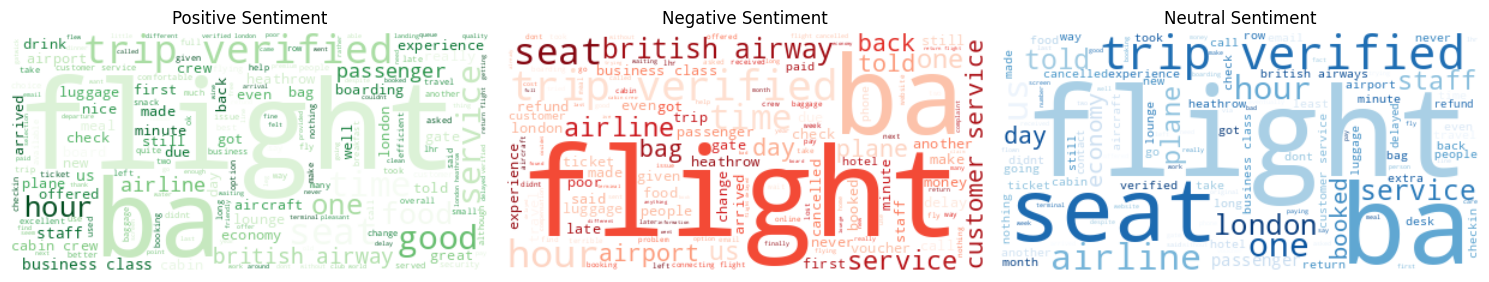

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate text by sentiment
positive_text = " ".join(df1[df1['Sentiment'] == "positive"]['Review'])
negative_text = " ".join(df1[df1['Sentiment'] == "negative"]['Review'])
neutral_text = " ".join(df1[df1['Sentiment'] == "neutral"]['Review'])

# Generate word clouds
positive_wc = WordCloud(background_color="white", colormap="Greens").generate(positive_text)
negative_wc = WordCloud(background_color="white", colormap="Reds").generate(negative_text)
neutral_wc = WordCloud(background_color="white", colormap="Blues").generate(neutral_text)

# Plot word clouds
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(positive_wc, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Positive Sentiment")

axes[1].imshow(negative_wc, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Negative Sentiment")

axes[2].imshow(neutral_wc, interpolation="bilinear")
axes[2].axis("off")
axes[2].set_title("Neutral Sentiment")

plt.tight_layout()
plt.show()


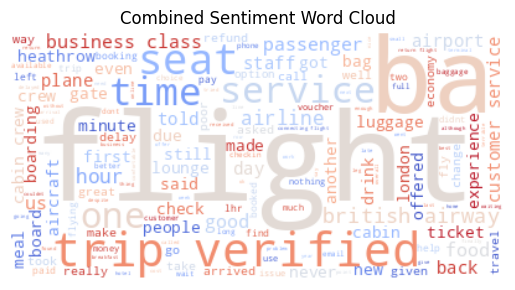

In [45]:
combined_text = " ".join(df1['Review'])
wc = WordCloud(background_color="white", colormap="coolwarm").generate(combined_text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Combined Sentiment Word Cloud")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     1000 non-null   object
 1   Sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
